## Importing the libraries

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
dataset = pd.read_csv('Lungs_Cancer.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values
dataset

,Cough Count,BloodPressure,Resistin,Insulin,BMI,Age,Classification
0,148,72,7.99585,0,33.6,50,1
1,85,66,4.06405,0,26.6,31,0
2,183,64,9.27715,0,23.3,32,1
3,89,66,12.76600,94,28.1,21,0
4,137,40,10.57635,168,43.1,33,1
...,...,...,...,...,...,...,...
111,155,62,10.96000,495,34.0,46,1
112,89,76,7.32000,37,31.2,23,0
113,76,62,10.33000,0,34.0,25,0
114,160,54,3.27000,175,30.5,39,1


# Checking the null values in dataset

In [3]:
dataset.isnull().sum()

Cough Count       0
BloodPressure     0
Resistin          0
Insulin           0
BMI               0
Age               0
Classification    0
dtype: int64

# Data Visualization
   Plotting the data distribution plot

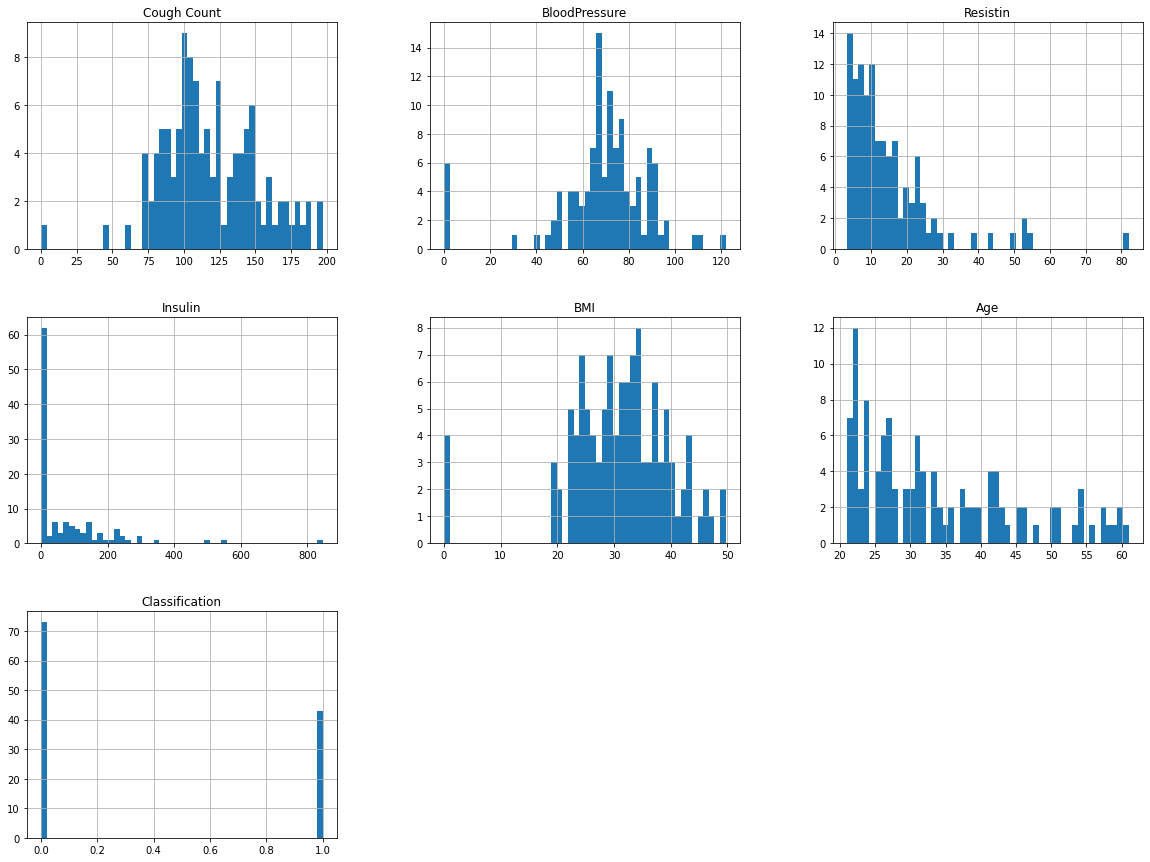

In [4]:
p = dataset.hist(bins=50, figsize = (20,15))

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print(X_train)

     Cough Count  BloodPressure  Resistin  Insulin   BMI  Age
93           134             72   5.76800        0  23.8   60
33            92             92   6.71026        0  19.9   28
45           180             66   6.70520        0  42.0   25
3             89             66  12.76600       94  28.1   21
48           103             66   4.53000        0  39.1   31
..           ...            ...       ...      ...   ...  ...
112           89             76   7.32000       37  31.2   23
67           109             92  13.91245        0  42.7   54
64           114             66   8.20490        0  32.8   42
47            71             70   4.66380        0  28.0   22
44           159             64   4.29890        0  27.4   40

[87 rows x 6 columns]


In [7]:
print(y_train)

[1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 0 1 0 0]


In [8]:
print(X_test)

     Cough Count  BloodPressure  Resistin  Insulin   BMI  Age
10           110             92   6.92000        0  37.6   30
74            79             75   5.68000        0  32.0   22
66           109             88  10.34455        0  32.5   38
51           101             50  11.77400       36  24.2   26
7            115              0   5.10420        0  35.3   29
78           131              0  24.37010        0  43.2   26
92            81             78  24.24591       48  46.7   42
90            80             55  17.55503        0  19.1   21
107          144             58   8.89000      140  29.5   37
62            44             62  22.94254        0  25.0   36
30           109             75  22.32024        0  36.0   60
2            183             64   9.27715        0  23.3   32
94           142             82  11.50005       64  24.7   21
22           196             90  24.60330        0  39.8   41
43           171            110  11.78796      240  45.4   54
84      

In [9]:
print(y_test)

[0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1]


## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 6.38846089e-01  1.43601825e-01 -6.90949655e-01 -7.19421281e-01
  -7.58630341e-01  2.46577773e+00]
 [-7.52300281e-01  1.19346391e+00 -6.18545209e-01 -7.19421281e-01
  -1.20832160e+00 -4.61610416e-01]
 [ 2.16248259e+00 -1.71356800e-01 -6.18934026e-01 -7.19421281e-01
   1.33992885e+00 -7.36053055e-01]
 [-8.51667879e-01 -1.71356800e-01 -1.53214514e-01  4.37594891e-01
  -2.62816905e-01 -1.10197657e+00]
 [-3.87952422e-01 -1.71356800e-01 -7.86079135e-01 -7.19421281e-01
   1.00554305e+00 -1.87167777e-01]
 [-1.21601574e+00 -1.01124647e+00 -1.40143815e-01  3.63742795e-01
   7.15689001e-02 -6.44572176e-01]
 [ 1.16880661e+00 -1.71356800e-01  6.42223163e-01  3.49014820e+00
   4.98199066e-01  8.19121900e-01]
 [ 1.03631648e+00  1.19346391e+00 -7.99910562e-01 -7.19421281e-01
   9.46299901e-02  2.55725861e+00]
 [ 9.70071415e-01  1.43601825e-01  4.61670022e-01  2.08695837e+00
   4.05954705e-01  6.36160141e-01]
 [ 1.20192914e+00 -4.86315424e-01  1.22416254e-02 -7.19421281e-01
  -4.93427806e-01 -1.0104

In [12]:
print(X_test)

[[-1.56094694e-01  1.19346391e+00 -6.02428523e-01 -7.19421281e-01
   8.32584871e-01 -2.78648657e-01]
 [-1.18289320e+00  3.01081137e-01 -6.97711686e-01 -7.19421281e-01
   1.86874350e-01 -1.01049569e+00]
 [-1.89217226e-01  9.83491491e-01 -3.39281784e-01 -7.19421281e-01
   2.44527075e-01  4.53198381e-01]
 [-4.54197487e-01 -1.01124647e+00 -2.29441044e-01 -2.76308704e-01
  -7.12508161e-01 -6.44572176e-01]
 [ 9.51796914e-03 -3.63590167e+00 -7.41956884e-01 -7.19421281e-01
   5.67382336e-01 -3.70129536e-01]
 [ 5.39478491e-01 -3.63590167e+00  7.38459158e-01 -7.19421281e-01
   1.47829539e+00 -6.44572176e-01]
 [-1.11664814e+00  4.58560450e-01  7.28916242e-01 -1.28604512e-01
   1.88186447e+00  8.19121900e-01]
 [-1.14977067e+00 -7.48780945e-01  2.14780588e-01 -7.19421281e-01
  -1.30056596e+00 -1.10197657e+00]
 [ 9.70071415e-01 -5.91301632e-01 -4.51051240e-01  1.00379429e+00
  -1.01389275e-01  3.61717501e-01]
 [-2.34218185e+00 -3.81329216e-01  6.28763648e-01 -7.19421281e-01
  -6.20263801e-01  2.7023

# Model Building

# Building Support Vector Machine Model

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Changing the input data to numpy array and reshaping the array as we are predicting for 1 instance

In [14]:
input_data = (122,68,8.087,88,27.678,38)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [15]:

data = sc.transform(input_data_reshaped)
print(data)




[[ 0.2413757  -0.06637059 -0.51275477  0.3637428  -0.31147581  0.45319838]]


## Predicting the Test set results

In [16]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# Making the Confusion Matrix and Calculating Precision and Recall

In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(Precision)
print(Recall)

[[11  4]
 [ 2 12]]
0.75
0.8571428571428571


# Calculating Accuracy and F1 Score

In [18]:
from sklearn.metrics import accuracy_score, f1_score
Accuracy = accuracy_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(Accuracy)
print(F1_Score)

0.7931034482758621
0.7999999999999999


# Building a Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predicting the Test set results

In [20]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# Making the Confusion Matrix and Calculating Precision and Recall

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(Precision)
print(Recall)

[[11  4]
 [ 3 11]]
0.7333333333333333
0.7857142857142857


# Calculating Accuracy and F1 Score

In [22]:
Accuracy = accuracy_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(Accuracy)
print(F1_Score)

0.7586206896551724
0.7586206896551724


# Building a Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting the Test set results

In [24]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]]


# Making the Confusion Matrix and Calculating Precision and Recall

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(Precision)
print(Recall)

[[12  3]
 [ 7  7]]
0.7
0.5


# Calculating Accuracy and F1 Score

In [26]:
Accuracy = accuracy_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(Accuracy)
print(F1_Score)

0.6551724137931034
0.5833333333333334


# Building a Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Predicting the Test set results

In [28]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


# Making the Confusion Matrix and Calculating Precision and Recall

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(Precision)
print(Recall)

[[13  2]
 [ 8  6]]
0.75
0.42857142857142855


# Calculating Accuracy and F1 Score

In [30]:
Accuracy = accuracy_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
print(Accuracy)
print(F1_Score)

0.6551724137931034
0.5454545454545454


# The Conclusion from Model Building

# Therefore Support Vector Machine is the best model for this prediction since it has an accuracy_score of 0.79

# Predicting a new result

In [37]:
prediction = classifier.predict(data)
print(prediction)

[0]


In [38]:
if (prediction[0] == 0):
    print('The person does not have Lungs cancer')
else:
    print('The person has Lungs cancer')

The person does not have Lungs cancer


# Feature Importance

# Plotting Feature importance

<AxesSubplot:ylabel='None'>

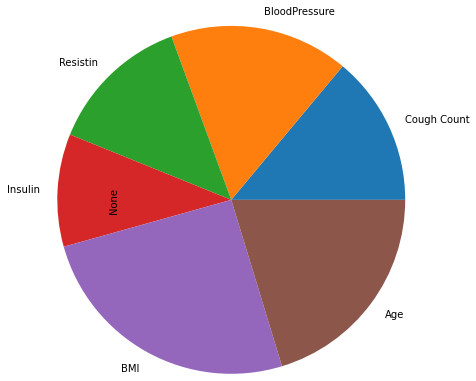

In [39]:
(pd.Series(classifier.feature_importances_, index=X.columns).plot(kind='pie', radius=2))

# Here from the above graph, it is clearly visible that BMI as a feature is the most important in this dataset

# Conclusion

# After using all these patient records, we are able to build a machine learning model (Support Vector Machine – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.